In [207]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne, glob
import eeglabio
import pandas as pd

%matplotlib inline

In [208]:
path = 'C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\EngagementStudy\\CleanSetFiles\\Adaptive'
os.chdir(path)

In [231]:
data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')


Reading C:\Users\anita\OneDrive\Bureaublad\Anita's stuff II\Tilburg university\Brainihacks\EngagementStudy\CleanSetFiles\Adaptive\1Adaptive_Clean.fdt


C:\Users\anita\AppData\Local\Temp\ipykernel_19960\2944475966.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')
C:\Users\anita\AppData\Local\Temp\ipykernel_19960\2944475966.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')
C:\Users\anita\AppData\Local\Temp\ipykernel_19960\2944475966.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab('1Adaptive_Clean.set')


In [210]:
data[0][0][0]

array([-0.74536856, -0.96127387, -0.84272637, ..., -9.130679  ,
       -5.918026  , -1.97396375])

In [232]:
d = {'Fz': data[0][0][0], 'F3': data[1][0][0], 'Cz': data[2][0][0], 'F4': data[3][0][0], 'Pz': data[4][0][0],
     'C3': data[5][0][0], 'Oz': data[6][0][0], 'C4': data[7][0][0]}

df = pd.DataFrame(d)

In [233]:
df



,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,-0.745369,3.839414,72.099440,39.915996,-10.861428,14.168317,4.757535,0.017539
1,-0.961274,4.267098,72.023920,38.573204,-10.452202,14.093481,5.680151,1.983018
2,-0.842726,5.349151,72.130376,37.390256,-10.204308,14.071094,7.710798,5.470377
3,0.157931,7.243006,72.788272,37.356420,-10.216404,14.172132,10.289900,9.527016
4,2.250161,9.967072,74.123984,38.495804,-10.365649,14.357589,12.638545,13.279177
...,...,...,...,...,...,...,...,...
138357,-9.872820,-2.121839,-6.310038,-11.375951,-12.713873,12.442694,-21.084656,-12.216551
138358,-10.617758,-1.018943,-5.562849,-9.825840,-11.680382,13.721793,-18.546742,-8.462695
138359,-9.130679,0.191533,-3.952903,-6.843225,-10.197091,15.134178,-16.720966,-5.530647
138360,-5.918026,1.317605,-1.942602,-3.228733,-8.663550,16.112850,-16.426963,-4.840267


In [236]:
def getEEGIndex(channel):
    epochs = []
    buffer = []
    #sample freq = 256 Hz
    #10 seconds = 2560 samples per epoch
    count = 0
    for i in range(len(channel)):
         
        buffer.append(channel[i])
        
        if count == 256:
            spectral = np.fft.fft(buffer).real
            
            alpha = np.nanmean(spectral[8:12])
            
            beta = np.nanmean(spectral[13:30])
            theta = np.nanmean(spectral[4:8])
        
            EEGIndex = beta/(alpha+theta)
            epochs.append(EEGIndex)
            count = 0
            buffer = []
            
        count += 1
        
        
        
    return epochs



In [237]:
def getEngagement(participant_df):
    channels = []
    for i in participant_df.columns:
        #print(participant_df[i])
        channels.append(getEEGIndex(participant_df[i])) 
        
    EEG_Engagement = pd.DataFrame(channels)
    EEG_Engagement = EEG_Engagement.T
    
    dcols = list(participant_df.columns)
    EEG_Engagement = EEG_Engagement.set_axis(dcols, axis=1, inplace=False)
    
    return EEG_Engagement



In [241]:
EEG_Engagement = pd.DataFrame(getEngagement(df))
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,0.136468,-2.460327,0.053993,-0.019404,-0.224225,-0.329006,-0.623597,-0.646063
1,0.897885,-0.384739,-0.284034,-1.563485,-0.004454,-0.039819,0.126800,0.064891
2,-0.050121,-0.326225,-0.133760,-0.725807,0.019230,-4.399840,0.393181,0.502622
3,0.403851,0.892201,-31.536801,-0.128185,0.375720,-0.619027,-0.001744,0.233561
4,0.161660,0.643696,2.025280,-0.840214,6.721910,-0.314256,-0.497658,-0.522292
...,...,...,...,...,...,...,...,...
535,0.751339,-0.816837,0.624757,1.144354,0.523396,0.283448,0.244101,0.745540
536,0.005314,0.319083,0.248371,-0.237057,0.052369,0.079463,-0.016002,-0.270300
537,0.052396,-0.012852,0.063912,-0.924492,-0.215799,-0.171108,-0.129134,-0.111930
538,-0.057294,0.216730,0.009591,-0.062364,-1.359049,-0.081183,-0.193377,0.542071


In [242]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(EEG_Engagement)

EEG_Engagement[:] = scaler.transform(EEG_Engagement)
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4
0,0.554456,0.235782,0.119043,0.001363,0.066957,0.767529,0.339648,0.295693
1,0.565302,0.284410,0.117770,0.001259,0.067836,0.771899,0.342467,0.300937
2,0.551798,0.285781,0.118336,0.001315,0.067930,0.706008,0.343468,0.304166
3,0.558265,0.314327,0.000000,0.001355,0.069356,0.763146,0.341985,0.302181
4,0.554815,0.308505,0.126472,0.001308,0.094734,0.767752,0.340121,0.296606
...,...,...,...,...,...,...,...,...
535,0.563214,0.274287,0.121194,0.001441,0.069947,0.776784,0.342908,0.305958
536,0.552588,0.300900,0.119776,0.001348,0.068063,0.773702,0.341931,0.298465
537,0.553259,0.293123,0.119081,0.001302,0.066990,0.769915,0.341506,0.299633
538,0.551696,0.298502,0.118876,0.001360,0.062419,0.771274,0.341265,0.304457


In [243]:
EEG_Engagement['Frontal'] = EEG_Engagement[["Fz", "F3", "F4"]].mean(axis = 1)
EEG_Engagement['Central'] = EEG_Engagement[["Cz", "C3", "C4"]].mean(axis = 1)
EEG_Engagement['Parietal'] = EEG_Engagement[["Pz", "Oz"]].mean(axis = 1)
EEG_Engagement['Total'] = EEG_Engagement.mean(axis = 1)
EEG_Engagement

,Fz,F3,Cz,F4,Pz,C3,Oz,C4,Frontal,Central,Parietal,Total
0,0.554456,0.235782,0.119043,0.001363,0.066957,0.767529,0.339648,0.295693,0.263867,0.394088,0.203303,0.294703
1,0.565302,0.284410,0.117770,0.001259,0.067836,0.771899,0.342467,0.300937,0.283657,0.396869,0.205152,0.303414
2,0.551798,0.285781,0.118336,0.001315,0.067930,0.706008,0.343468,0.304166,0.279632,0.376170,0.205699,0.294573
3,0.558265,0.314327,0.000000,0.001355,0.069356,0.763146,0.341985,0.302181,0.291316,0.355109,0.205670,0.291155
4,0.554815,0.308505,0.126472,0.001308,0.094734,0.767752,0.340121,0.296606,0.288209,0.396943,0.217428,0.308445
...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.563214,0.274287,0.121194,0.001441,0.069947,0.776784,0.342908,0.305958,0.279647,0.401312,0.206427,0.303920
536,0.552588,0.300900,0.119776,0.001348,0.068063,0.773702,0.341931,0.298465,0.284945,0.397314,0.204997,0.304003
537,0.553259,0.293123,0.119081,0.001302,0.066990,0.769915,0.341506,0.299633,0.282561,0.396209,0.204248,0.302530
538,0.551696,0.298502,0.118876,0.001360,0.062419,0.771274,0.341265,0.304457,0.283853,0.398202,0.201842,0.303068


,Fz,F3,Cz,F4,Pz,C3,Oz,C4,Frontal,Central,Parietal,Total
0,0.554456,0.235782,0.119043,0.001363,0.066957,0.767529,0.339648,0.295693,0.002416,0.176216,0.284970,0.003172
1,0.565302,0.284410,0.117770,0.001259,0.067836,0.771899,0.342467,0.300937,0.002502,0.178543,0.287977,0.003376
2,0.551798,0.285781,0.118336,0.001315,0.067930,0.706008,0.343468,0.304166,0.002499,0.165288,0.288877,0.003142
3,0.558265,0.314327,0.000000,0.001355,0.069356,0.763146,0.341985,0.302181,0.002651,0.067274,0.288758,0.001428
4,0.554815,0.308505,0.126472,0.001308,0.094734,0.767752,0.340121,0.296606,0.002570,0.183631,0.306894,0.003999
...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.563214,0.274287,0.121194,0.001441,0.069947,0.776784,0.342908,0.305958,0.002645,0.185265,0.289978,0.003694
536,0.552588,0.300900,0.119776,0.001348,0.068063,0.773702,0.341931,0.298465,0.002578,0.179655,0.287711,0.003467
537,0.553259,0.293123,0.119081,0.001302,0.066990,0.769915,0.341506,0.299633,0.002513,0.178683,0.286529,0.003354
538,0.551696,0.298502,0.118876,0.001360,0.062419,0.771274,0.341265,0.304457,0.002579,0.181107,0.282785,0.003375


In [244]:
EEG_Engagement.to_csv('P1_Engagement') 

Text(0.5, 1.0, 'EEG Engagement Index Different Electrodes')

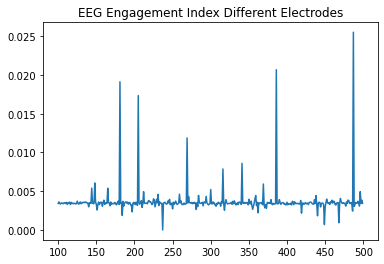

In [240]:
#plt.plot(EEG_Engagement['Frontal'])
#plt.plot(EEG_Engagement['Central'])
#plt.plot(EEG_Engagement['Parietal'])
plt.plot(EEG_Engagement['Total'][100:500])
plt.title('EEG Engagement Index Different Electrodes')


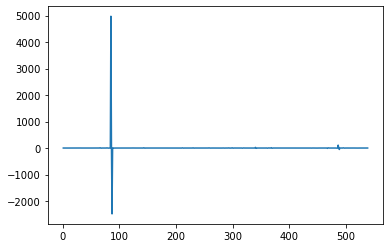

In [230]:
lag = EEG_Engagement['Frontal'].shift(1)
lead = EEG_Engagement['Frontal'].shift(-1)

vec = (lead-lag/2)
plt.plot(vec)